# homework ada11

### TMI M1 37-176839 Koichrio Tamura

#### homework1

フィッシャー判別分析を実装せよ

##### answer

[ 0.9583855   2.99432884] [ 2.77796828  0.97754624]


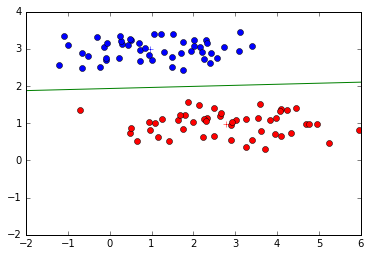

In [5]:
%matplotlib inline
import numpy as np
from  pylab import *
from matplotlib import pyplot as plt
import sys

N = 100  # データ数

def f(x, a, b):
    return a * x + b

if __name__ == "__main__":
    # 訓練データを作成
    cls1 = []
    cls2 = []
    
    # データは正規分布に従って生成
    mean1 = [1, 3]  # クラス1の平均
    mean2 = [3, 1]  # クラス2の平均
    cov = [[2.0,0.0], [0.0, 0.1]]  # 共分散行列（全クラス共通）
    
    # データ作成
    cls1.extend(np.random.multivariate_normal(mean1, cov, int(N/2)))
    cls2.extend(np.random.multivariate_normal(mean2, cov, int(N/2)))
    
    # 各クラスの平均をプロット
    m1 = np.mean(cls1, axis=0)
    m2 = np.mean(cls2, axis=0)
    plt.plot([m1[0]], [m1[1]], 'b+')
    plt.plot([m2[0]], [m2[1]], 'r+')
    print(m1, m2)
    
    # 総クラス内共分散行列を計算
    Sw = zeros((2, 2))
    for n in range(len(cls1)):
        xn = matrix(cls1[n]).reshape(2, 1)
        m1 = matrix(m1).reshape(2, 1)
        Sw += (xn - m1) * transpose(xn - m1)
    for n in range(len(cls2)):
        xn = matrix(cls2[n]).reshape(2, 1)
        m2 = matrix(m2).reshape(2, 1)
        Sw += (xn - m2) * transpose(xn - m2)
    Sw_inv = np.linalg.inv(Sw)
    w = Sw_inv * (m2 - m1)
    
    # 訓練データを描画
    x1, x2 = np.transpose(np.array(cls1))
    plt.plot(x1, x2, 'bo')
    
    x1, x2 = np.transpose(np.array(cls2))
    plt.plot(x1, x2, 'ro')
    
    # 識別境界を描画
    # wは識別境界と直交するベクトル
    a = - (w[0,0] / w[1,0])  # 識別直線の傾き
    
    # 傾きがaでmを通る直線のy切片bを求める
    m = (m1 + m2) / 2
    b = -a * m[0,0] + m[1,0]  # 識別直線のy切片
    
    x1 = np.linspace(-2, 6, 1000)
    x2 = [f(x, a, b) for x in x1]
    plt.plot(x1, x2, 'g-')
    
    xlim(-2, 6)
    ylim(-2, 4)
    plt.show()

#### homework2

以下の散布行列のペア表現を求めよ

クラス内


$$\mathbf{S}^{(w)} = \frac{1}{2}\sum_{i, i'=1}^{n}{\mathbf{Q_{i,i'}^{(w)}}(\mathbf{x_{i}}- \mathbf{x_{i'}})(\mathbf{x_{i}}- \mathbf{x_{i'}})^{T}}$$

$$\mathbf{Q_{i,i'}^{(w)}} = \begin{cases} 1/n\quad -\quad 1/n_{ y }\qquad (y_{ i }=y_{ i' }=y) \\ 1/n\qquad (y_{ i }\neq y_{ i' }) \end{cases}$$


クラス間

$$\mathbf{S}^{(b)} = \frac{1}{2}\sum_{i, i'=1}^{n}{\mathbf{Q_{i,i'}^{(b)}}(\mathbf{x_{i}}- \mathbf{x_{i'}})(\mathbf{x_{i}}- \mathbf{x_{i'}})^{T}}$$

$$\mathbf{Q_{i,i'}^{(b)}} = \begin{cases} 1/n\quad -\quad 1/n_{ y }\qquad (y_{ i }=y_{ i' }=y) \\ 1/n\qquad (y_{ i }\neq y_{ i' }) \end{cases}$$


#### answer

\begin{eqnarray}
\mathbf{S}^{(w)} &=& \sum_{i=1}^{l}{\sum_{j:y_{j}=i}{(\mathbf{x_{j}} -\frac{1}{n_{i}}\sum_{p:y_{p}=i}{\mathbf{x_{p}}}) (\mathbf{x_{j}} - \frac{1}{n_{i}} \sum_{q:y_{q}=i}{\mathbf{x_{q}}} )^{T}}} \\
&=& \sum_{i=1}^{l}{ \mathbf{x_{i}x_{i}^{T}} } - \sum_{i=1}^{l}{ \frac{1}{n_{i}} \sum_{p,q: y_{p}=y_{q}=i}{\mathbf{x_{p}x_{q}^{T}} } }  \\ 
&=& \sum_{i=1}^{n}{(\sum_{j=1}^{n}{\mathbf{A}_{i,j}^{(w)}})\mathbf{x_{i}x_{i}^{T}}  } - \sum_{i,j=1}^{n}{ \mathbf{A}_{i,j}^{(w)}\mathbf{x_{i}x_{i}^{T}} }   \\
&=& \frac{1}{2} \sum_{i,j=1}^{n}{\mathbf{A}_{i,j}^{(w)}(\mathbf{x_{i}x_{i}^{T}} + \mathbf{x_{j}x_{j}^{T}} - \mathbf{x_{i}x_{j}^{T}} - \mathbf{x_{j}x_{i}^{T}})}
\end{eqnarray}

ここで
\begin{eqnarray}
\mathbf{S}^{(m)} &=& \mathbf{S}^{(w)} + \mathbf{S}^{(b)}  \\
&=& \sum_{i=1}^{n}{(x_{i}-\mu)(x_{i}-\mu)^{T}}
\end{eqnarray}
であるから

\begin{eqnarray}
\mathbf{S}^{(b)} &=& \sum_{i=1}^{n}{ \mathbf{x_{i}x_{i}^{T}} } - \frac{1}{n}\sum_{i,j=1}^{n}{\mathbf{x_{i}x_{j}^{T}}} - \mathbf{S}^{(w)}  \\
&=& \sum_{i=1}^{n}{ (\sum_{j=1}^{n}{ \frac{1}{n} } ) \mathbf{x_{i}x_{i}^{T}}} - \sum_{i,j=1}^{n}{\frac{1}{n}\mathbf{x_{i}x_{j}^{T}}} - \mathbf{S}^{(w)}  \\
&=&  \frac{1}{2} \sum_{i,j=1}^{n}{(\frac{1}{n}- \mathbf{A}_{i,j}^{(w)})(\mathbf{x_{i}x_{i}^{T}} + \mathbf{x_{j}x_{j}^{T}} - \mathbf{x_{i}x_{j}^{T}} - \mathbf{x_{j}x_{i}^{T}})}
\end{eqnarray}